# **Ensemble Learning: Bagging vs Boosting** 
### Understanding Variance Reduction and Bias Reduction in Machine Learning


## 1. **Theory Background**

### 1.1 What is Bagging?

Bagging trains many models independently on *bootstrap samples* of the dataset.  
A bootstrap sample is created by sampling with replacement.

The key insights:

- Each model sees a slightly different dataset.
- Their errors average out.
- This dramatically reduces **variance**.

Random Forest is a famous extension of bagging, but here we use a simple bagged Decision Tree to keep the behaviour clear.

---

### 1.2 What is Boosting?

Boosting trains models **sequentially**, not independently.

Each new model focuses on the mistakes of the previous one.  
In Gradient Boosting, each model fits the negative gradient of the loss.

Key insight:

- Boosting reduces **bias** by adding many small corrections.
- It creates a strong predictor from many weak learners.

---

### 1.3 High-Level Comparison

| Method | How It Learns | What It Improves | Risk |
|--------|------------------------|---------------------|------------------|
| Bagging | Parallel learners on bootstrap samples | Variance | Less interpretable |
| Boosting | Sequential learners correcting error | Bias | Can overfit if too many estimators |

In the visual experiments below, these differences become obvious.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
np.random.seed(42)


## **2. Dataset Generation**

I use the classic **two-moons** dataset, which is:

- non-linear  
- noisy  
- ideal for decision boundary interpretation  

This dataset allows us to visually compare how bagging and boosting shape decision regions as the model grows.


In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=600, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


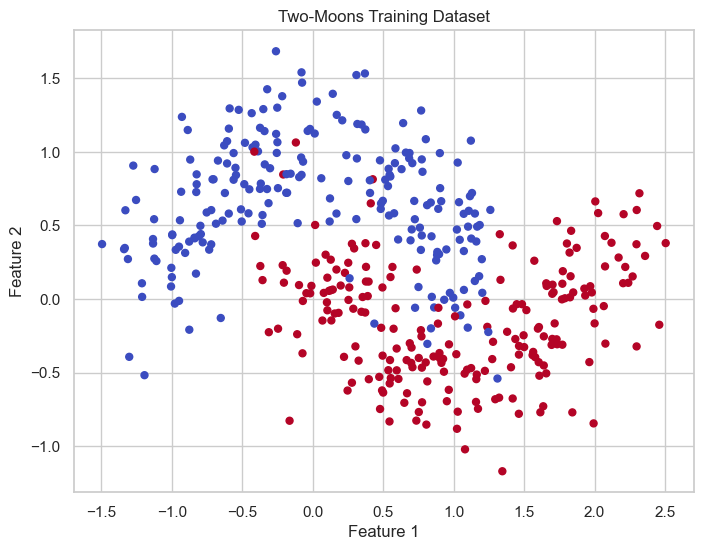

In [8]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm", s=25)
plt.title("Two-Moons Training Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()  # <<FIGURE 1 PLACEHOLDER>>


## **3. Baseline: Single Decision Tree**

Before comparing ensembles, I train a single Decision Tree.  
Decision Trees are:

- highly flexible  
- high variance  
- unstable to noise  

This makes them perfect for demonstrating the benefits of ensemble learning.


In [9]:
baseline_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
baseline_tree.fit(X_train, y_train)

y_pred_base = baseline_tree.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_base)
baseline_acc


0.8888888888888888

In [10]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=20)
    plt.title(title)
    plt.show()


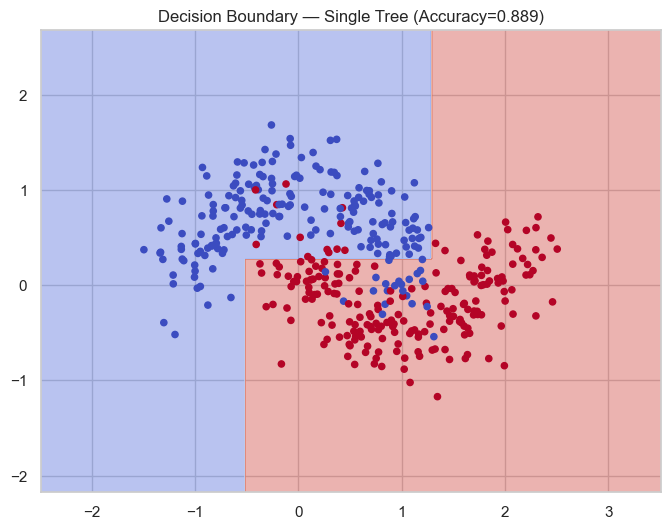

In [ ]:
plot_decision_boundary(
    baseline_tree, X_train, y_train,
    title=f"Decision Boundary — Single Tree (Accuracy={baseline_acc:.3f})"
)


## **4. Bagging Ensemble**

Bagging trains many independent trees and averages their predictions.

We expect:

- smoother boundaries  
- reduced variance  
- improved generalisation  


In [12]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    bootstrap=True,
    random_state=42
)

bag_model.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag_model.predict(X_test))
bag_acc


0.9

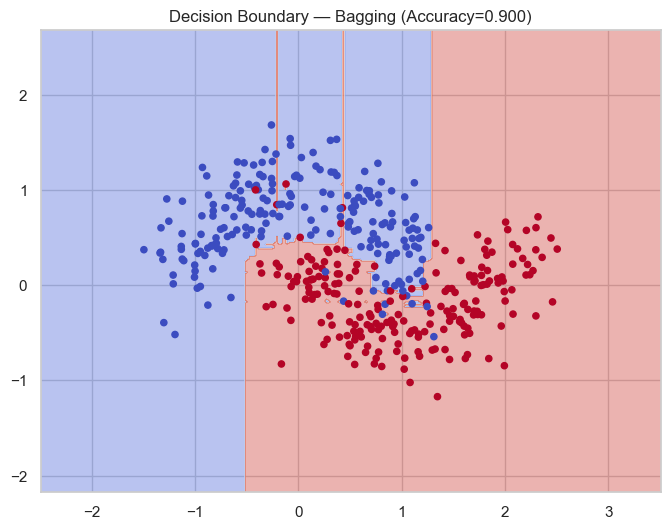

In [ ]:
plot_decision_boundary(
    bag_model, X_train, y_train,
    title=f"Decision Boundary — Bagging (Accuracy={bag_acc:.3f})"
)


## **5. Boosting Ensemble (Gradient Boosting)**

Boosting trains sequential weak learners.
Each new tree tries to correct the residual error of previous trees.

We expect:

- more refined boundaries  
- lower bias  
- improved accuracy compared to bagging  


In [14]:
boost_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

boost_model.fit(X_train, y_train)
boost_acc = accuracy_score(y_test, boost_model.predict(X_test))
boost_acc


0.8944444444444445

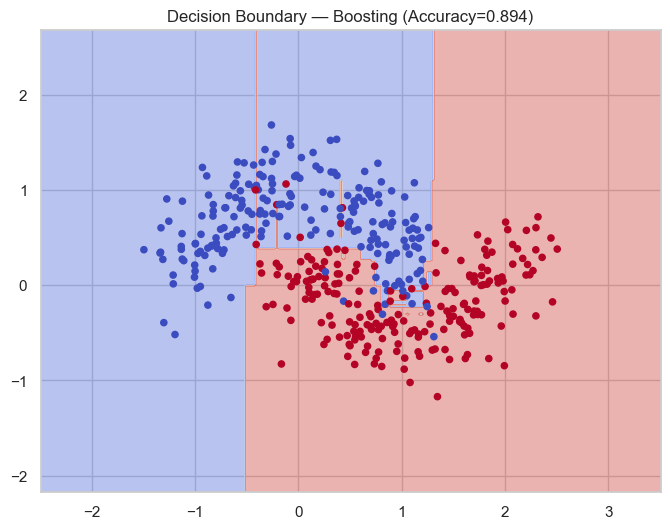

In [15]:
plot_decision_boundary(
    boost_model, X_train, y_train,
    title=f"Decision Boundary — Boosting (Accuracy={boost_acc:.3f})"
)


## **6. Performance vs Ensemble Size**

Here I measure how accuracy changes as the number of estimators increases.

We expect:

- Bagging → rapid early improvement (variance reduction)  
- Boosting → steady improvement (bias reduction)  


In [16]:
estimator_range = range(1, 101)
bag_scores = []
boost_scores = []

for n in estimator_range:
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n,
        bootstrap=True,
        random_state=42
    )
    bag.fit(X_train, y_train)
    bag_scores.append(accuracy_score(y_test, bag.predict(X_test)))

    boost = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=0.1,
        random_state=42
    )
    boost.fit(X_train, y_train)
    boost_scores.append(accuracy_score(y_test, boost.predict(X_test)))


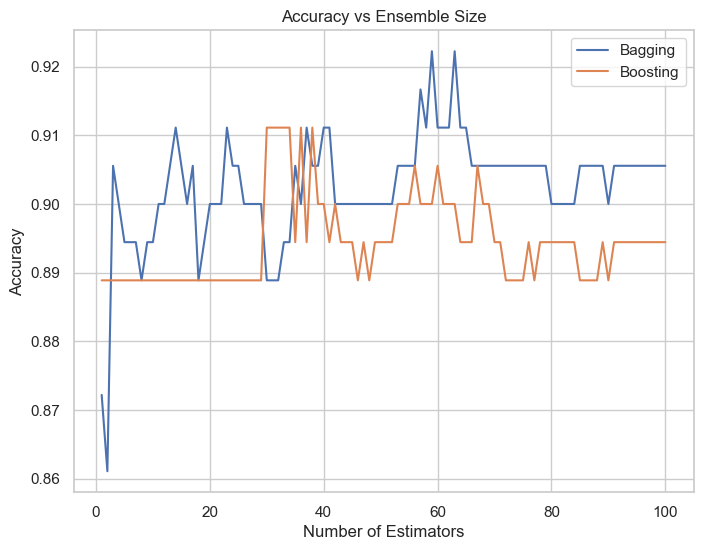

In [17]:
plt.plot(estimator_range, bag_scores, label="Bagging")
plt.plot(estimator_range, boost_scores, label="Boosting")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Ensemble Size")
plt.legend()
plt.show()  # <<FIGURE 5 PLACEHOLDER>>


## **7. Summary**

This notebook demonstrated that:

- **Bagging** reduces variance by averaging unstable learners.
- **Boosting** reduces bias by sequentially correcting mistakes.
- Bagging’s decision boundaries become smoother.
- Boosting’s boundaries become sharper and more refined.
- Both methods outperform a single decision tree.
- Their performance improves differently as ensemble size increases.

In the written report, these differences will be analysed using
the generated figures, mathematical intuition, and references from ML literature.
